<a href="https://colab.research.google.com/github/satishgunjal/Deep-Learning-Using-Python-Tensorflow-Keras/blob/master/02_Exercise_Keras_Digits_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
Use keras MNIST database of handwritten digits from https://keras.io/datasets/ to build a neural network. Figure out,
* Optiomal number of hidden layers and neurons in each hidden layer that can give you best accuracy
* Optional accuracy score

## Load the data

In [15]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print('x_train = ' , x_train.shape)
print('y_train = ' ,(y_train.shape))
print('x_test = ' ,(x_test.shape))
print('y_test = ' , (y_test.shape))

x_train =  (60000, 28, 28)
y_train =  (60000,)
x_test =  (10000, 28, 28)
y_test =  (10000,)


## Understanding the dataset
* Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
* x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
* y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
* ((The Uint8Array typed array represents an array of 8-bit unsigned integers)
* Its 8bit gray scale image every pixel is stored in 1byte of memmory. Min value in image data array is 0 means black, where max value is 255(2^8-1) means black
* For more details about Bit-Map Images pls refer [Bit-Map Images](https://courses.cs.vt.edu/~cs1204/art/bitmaps.html)

## Data visualization

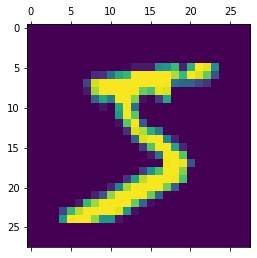

In [18]:
import matplotlib.pyplot as plt

#Show training set at index 0
plt.matshow(x_train[0])

In [20]:
#show corresponding label at index 0
y_train[0]

5

##Normalizing the training data
* We will use feature scaling for data normalization. Feature scaling involves dividing the input value by range(max - min).
* After feature scaling we get feature range from 0 to 1

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

## Now build sequential model and add layers to it
* Sequential model is linear stack of layers
* Here we are going to use Flatten, Dense and Activation layer
* We are going to use Flatten to convert our input image 2D array(28x28) to 1D array(784)
* We are using Dense layer  with activation function 'relu' to create our hidden layer. To start with we will use 100 neurons.
* And we will use Dense layer with activation function 'softmax' to create our output layer. Since we have 10 categories(labels) we are going use 10 neurons in this layer
* 'softmax' activation function in last layer is used to ditribute the set of numbers into the probabilty for the output classess(labels)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Compiling the model
* Before training the model we must compile the model
* In model compile step we configure the learning process of the model
* Arguments of the compile method
  * **An optimizer**. This could be the string identifier of an existing optimizer (such as rmsprop or Adam), or an instance of the Optimizer class. 
  * **A loss function**. An optimizer is nothing but an algorithm that helps to adjust the weights of the edges. 
  
    This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or sparse_categorical_crossentropy), or it can be an objective function.
  * **A list of metrics**. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training the model

In [36]:
model.fit(x_train,y_trainm)

Epoch 1/1
60000/60000 [==============================] - 5s 76us/step - loss: 1.1806 - accuracy: 0.7345


In [37]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 29us/step


[0.5910510490894317, 0.8565000295639038]

## **Accuracy is 85.6 %**

## Prediction
* Lets predict the value of test example at index 9 in test set (ans is 2 = Pullover)

In [0]:
yp = model.predict(x_test)

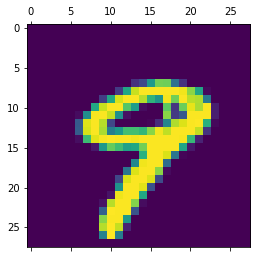

In [41]:
plt.matshow(x_test[9])

In [42]:
# probabilities for every class, choose the highest one
yp[9]

array([1.5382610e-03, 3.5741123e-05, 2.8103055e-04, 2.7935114e-04,
       1.1497555e-01, 6.5079150e-03, 8.1849826e-04, 3.2395265e-01,
       8.6797783e-03, 5.4293126e-01], dtype=float32)

In [44]:
import numpy as np

np.argmax(yp[9])

9